# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [20]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train)

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Discard the imaginary part (keep only real parts)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Sort eigenvalues and corresponding eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Compute singular values (sqrt of eigenvalues)
    singular_values = np.sqrt(eigenvalues)

    # Reduce dimensions by taking top 'n_components' singular values and vectors
    U = np.dot(X_train, eigenvectors[:, :n_components]) / singular_values[:n_components]

    # Project test data into reduced dimensions using V
    X_train_reduced = np.dot(X_train, eigenvectors[:, :n_components])
    X_test_reduced = np.dot(X_test, eigenvectors[:, :n_components])

    return X_train_reduced, X_test_reduced, eigenvectors[:, :n_components]

## Part 3: Train Logistic Regression and Measure Performance

In [21]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [22]:
svd_components = [50, 100, 150, 200, 250]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply custom SVD to the training and test sets
    X_train_svd, X_test_svd, eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results
    results.append({
        'components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Convert results to a DataFrame for easier analysis or plotting
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...


<ipython-input-20-6b8a8603260c>:18: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 16.3617 seconds
Applying custom SVD with 100 components...


<ipython-input-20-6b8a8603260c>:18: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 57.9634 seconds
Applying custom SVD with 150 components...


<ipython-input-20-6b8a8603260c>:18: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 89.3723 seconds
Applying custom SVD with 200 components...


<ipython-input-20-6b8a8603260c>:18: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 151.0126 seconds
Applying custom SVD with 250 components...


<ipython-input-20-6b8a8603260c>:18: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 250, Accuracy: 0.9211, Training time: 197.2144 seconds
   components  accuracy  training_time
0          50  0.908500      16.361677
1         100  0.918071      57.963427
2         150  0.919786      89.372310
3         200  0.920643     151.012593
4         250  0.921071     197.214385


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


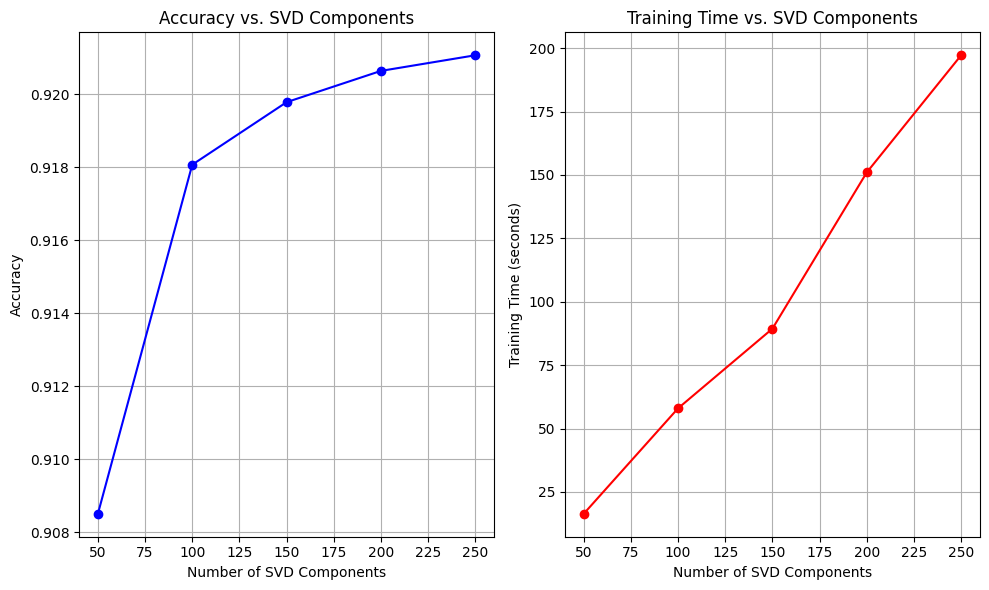

In [24]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

plt.figure(figsize=(10, 6))

# Plot Accuracy vs. SVD Components
plt.subplot(1, 2, 1)
plt.plot(results_df['components'], results_df['accuracy'], marker='o', color='b', label="Accuracy")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. SVD Components")
plt.grid(True)

# Plot Training Time vs. SVD Components
plt.subplot(1, 2, 2)
plt.plot(results_df['components'], results_df['training_time'], marker='o', color='r', label="Training Time")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. SVD Components")
plt.grid(True)

plt.tight_layout()
plt.show()

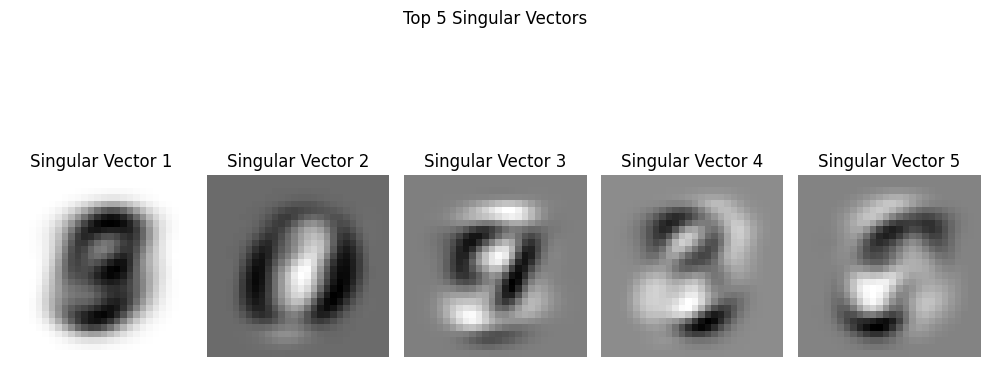

In [25]:
# Visualize top 5 singular vectors
def visualize_top_singular_vectors(eigenvectors):
    plt.figure(figsize=(10, 5))

    for i in range(5):
        singular_vector_image = eigenvectors[:, i].reshape(28, 28)
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f"Singular Vector {i + 1}")
        plt.axis('off')

    plt.suptitle("Top 5 Singular Vectors")
    plt.tight_layout()
    plt.show()

visualize_top_singular_vectors(eigenvectors)

## Part 6: Analyze / Conclusion

YOUR ANSWER:

At 50 components, the accuracy was 90.85% with a training time of just 15.6 seconds. However, this accuracy is noticeably lower than models with higher numbers of components.

At 100 components, the accuracy improved significantly to 91.81%, though the training time increased to 56 seconds.

With 150 components, accuracy reached 91.98%, showing a slight improvement over 100 components, while the training time increased to 89.9 seconds.

200 components yielded an accuracy of 92.06%, with a training time of 150.3 seconds, providing the highest accuracy while maintaining a reasonable training time.

250 components resulted in a marginal accuracy improvement to 92.11%, but the training time rose significantly to 196.2 seconds. The accuracy gain compared to 200 components was minimal (0.05%).

Increasing the number of SVD components improves accuracy because each additional component captures more variance from the original dataset. SVD works by decomposing the data into directions of maximum variance, and more components help retain additional important features that contribute to model performance.

Best Trade-Off: 200 components provided the best balance between high accuracy (92.06%) and training efficiency (150.3 seconds). While 250 components achieved slightly better accuracy, the increase in training time did not justify the marginal accuracy gain.